In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-mnt/ifood_df.csv


In [2]:
data = pd.read_csv('/kaggle/input/food-mnt/ifood_df.csv')
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [5]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [8]:
data.dtypes


Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [9]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [10]:
data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [11]:
print(data['Income'].value_counts())

Income
7500.0     12
47025.0     3
35860.0     3
81361.0     2
57100.0     2
           ..
87305.0     1
76618.0     1
50272.0     1
58398.0     1
52869.0     1
Name: count, Length: 1963, dtype: int64


In [12]:
print(pd.crosstab(data['Income'], data['Age']))

Age       24  25  26  27  28  29  30  31  32  33  ...  70  71  72  73  74  75  \
Income                                            ...                           
1730.0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2447.0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3502.0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4023.0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4428.0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...       ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
101970.0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
102160.0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
102692.0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
105471.0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
113734.0   0   0   0   0   0

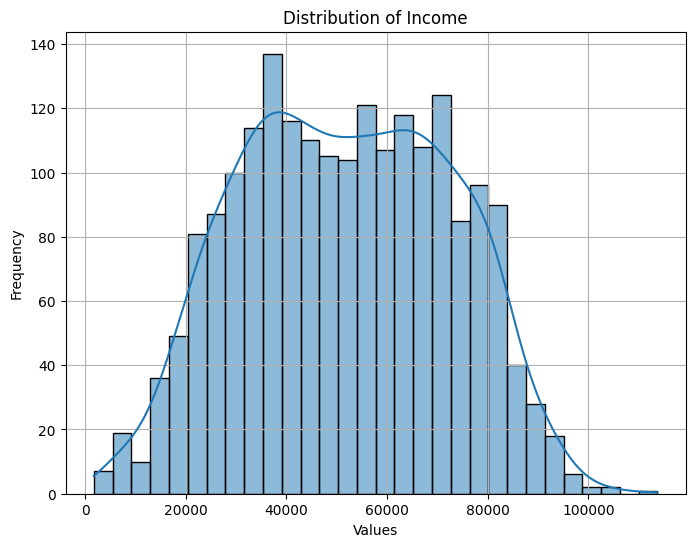

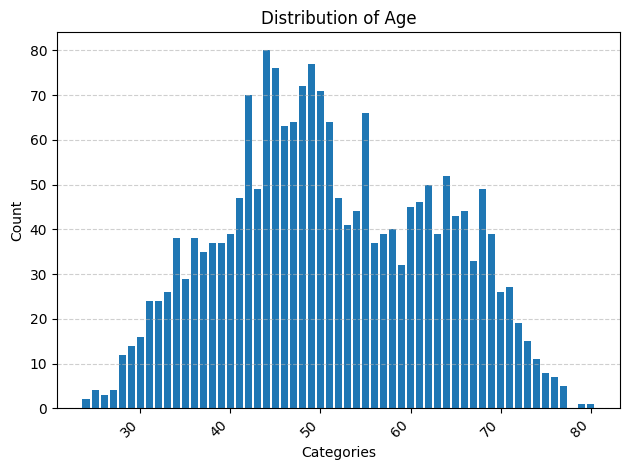

In [13]:
# Histogram for Income
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.grid(True)
plt.show()

# Count plot for Age
plt.bar(data['Age'].value_counts().index, data['Age'].value_counts().values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

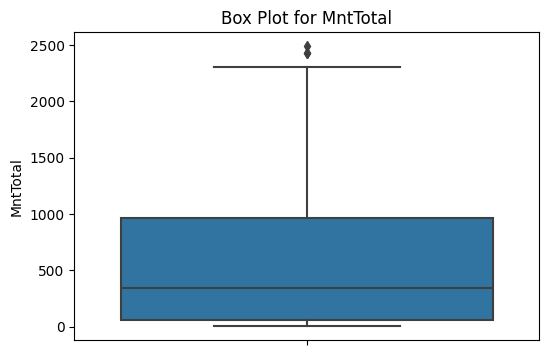

In [14]:
#Boxplot for MntTotal 
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [15]:
# IQR (Interquartile Range) based outlier detection (adjust threshold as needed)
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 3


In [16]:
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [17]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,...,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,51630.820119,0.444004,0.510406,48.893954,305.178394,26.199703,164.996036,37.518335,27.093162,43.875619,...,0.251734,0.034688,0.090684,0.024281,0.502478,0.165015,0.217542,560.985629,517.110010,0.300297
std,20676.523136,0.536322,0.546445,28.964198,336.123164,39.563725,218.284750,54.888293,41.356022,51.690029,...,0.434117,0.183033,0.287230,0.153960,0.500118,0.371286,0.412677,572.595924,550.571315,0.678306
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35395.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51400.500000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68138.000000,1.000000,1.000000,74.000000,505.000000,33.000000,227.750000,50.000000,33.750000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,882.250000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


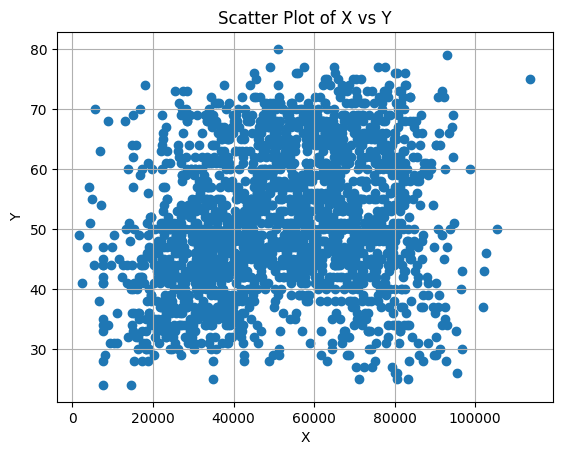

In [18]:
# Scatter plots for relationships 
plt.scatter(data['Income'], data['Age'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.grid(True)
plt.show()


In [19]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

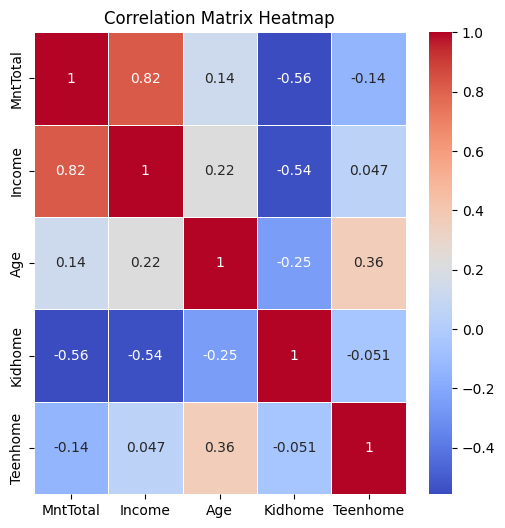

In [20]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
features = ['Income', 'MntTotal', 'Age']

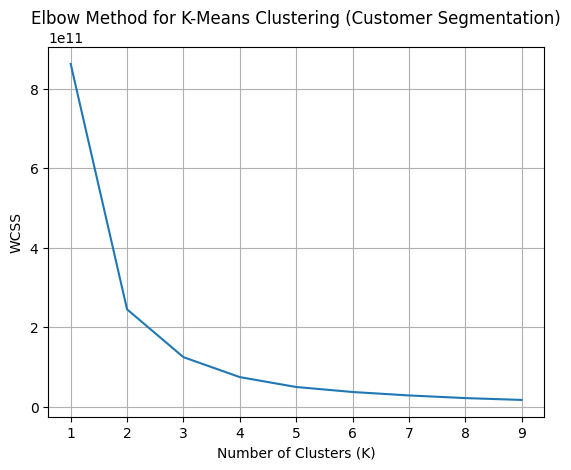

In [22]:
# Function to calculate WCSS (Within-Cluster Sum of Squares) for a given k
def calculate_wcss(data, features, k):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data[features])
  return kmeans.inertia_

# Calculate WCSS for a range of k values (adjust the range as needed)
wcss_list = []
for k in range(1, 10):
  wcss = calculate_wcss(data, features, k)
  wcss_list.append(wcss)

# Plot the WCSS vs. K
plt.plot(range(1, 10), wcss_list)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for K-Means Clustering (Customer Segmentation)')
plt.grid(True)
plt.show()

# Analyze the plot: Look for the 'elbow' where the WCSS starts decreasing slowly
# This K value is a potential candidate for the optimal number of clusters

Elbow method suggests 3 or 4 clusters.

In [23]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility
kmeans.fit(data[features])

KMeans(n_clusters=3, random_state=42)

In [24]:
data['cluster_label'] = kmeans.labels_
#This adds a new column named "cluster_label" to your DataFrame, assigning each customer to a specific cluster (segment).

In [25]:
# Analyze cluster characteristics
cluster_info = data.groupby('cluster_label').agg({
    'Income': ['mean', 'std'],
    'MntTotal': ['mean', 'std'],
    'Age' : ['mean', 'std']
})

print(cluster_info)

                     Income                  MntTotal                    Age  \
                       mean          std         mean         std       mean   
cluster_label                                                                  
0              75574.324575  8252.395884  1203.894900  447.519093  52.846986   
1              28006.809741  8436.134829    76.631659  112.115582  46.712329   
2              51672.175070  6909.171891   424.092437  352.800632  53.691877   

                          
                     std  
cluster_label             
0              12.397933  
1              10.683831  
2              10.596131  


**Visualisation to illustrate customer insights**

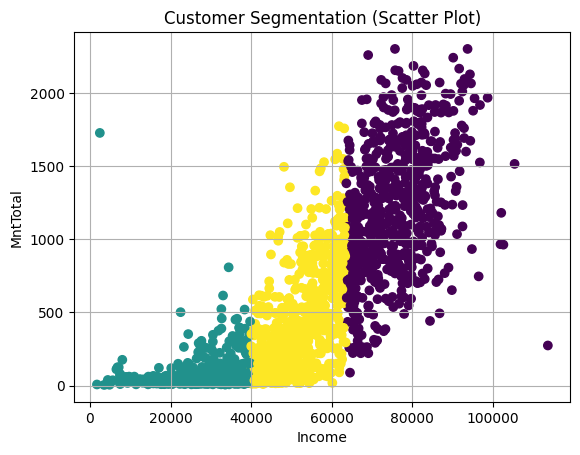

In [26]:
# Example: Scatter plot of Income vs. MntTotal colored by cluster
plt.scatter(data[features[0]], data[features[1]], c=data['cluster_label'])
plt.xlabel(features[0])  # Income label
plt.ylabel(features[1])  # MntTotal label
plt.title('Customer Segmentation (Scatter Plot)')
plt.grid(True)
plt.show()


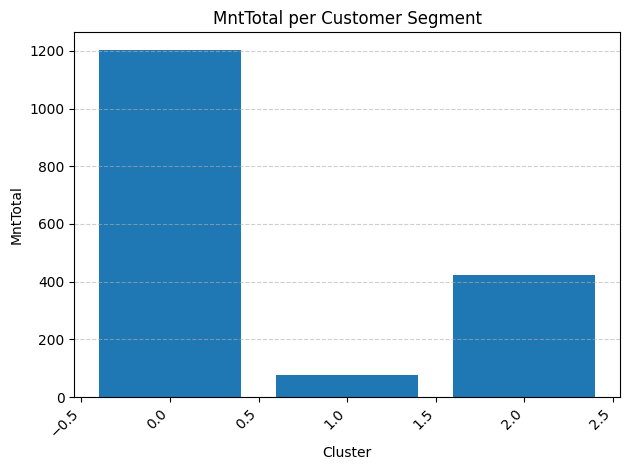

In [27]:
# Example: Average MntTotal per cluster 
cluster_info = data.groupby('cluster_label')['MntTotal'].mean()
plt.bar(cluster_info.index, cluster_info.values)
plt.xlabel('Cluster')
plt.ylabel('MntTotal')
plt.title('MntTotal per Customer Segment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [28]:
#Mean consumption of different product types by cluster
mnt_data = data.groupby('cluster_label')[cols_mnt].mean().reset_index()
mnt_data.head()

,cluster_label,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1203.894900,1133.587326,619.182380,56.363215,386.834621,81.799073,59.715611,70.307573
1,1,76.631659,58.806697,29.879756,5.948250,25.754947,8.942161,6.106545,17.824962
2,2,424.092437,380.197479,273.960784,17.501401,92.099440,23.687675,16.843137,43.894958


Text(0, 0.5, 'MntTotal')

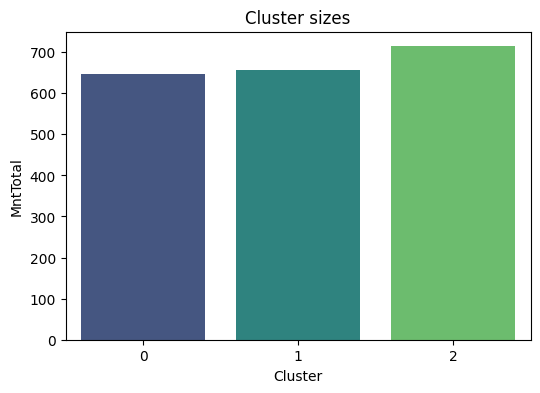

In [29]:
cluster_sizes = data.groupby('cluster_label')[['MntTotal']].count().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='cluster_label', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [30]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,cluster_label,MntTotal,Share%
0,0,647,32.0
1,1,657,33.0
2,2,714,35.0


**Income By Cluster**

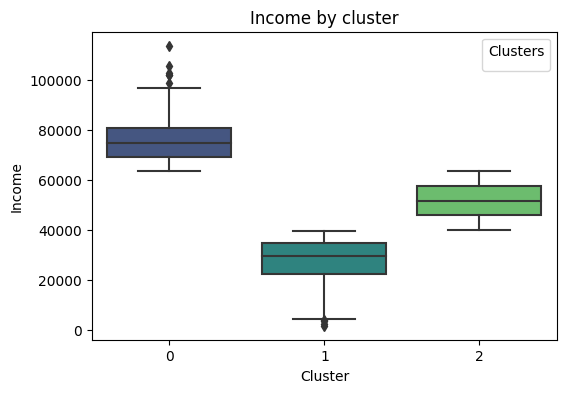

In [31]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='cluster_label', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

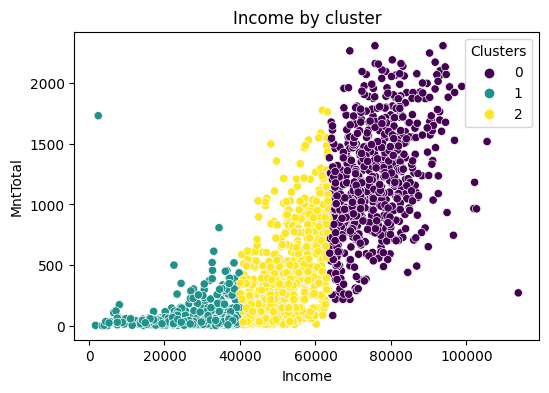

In [32]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'cluster_label', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

**Age feature by cluster **

Text(0, 0.5, 'Age')

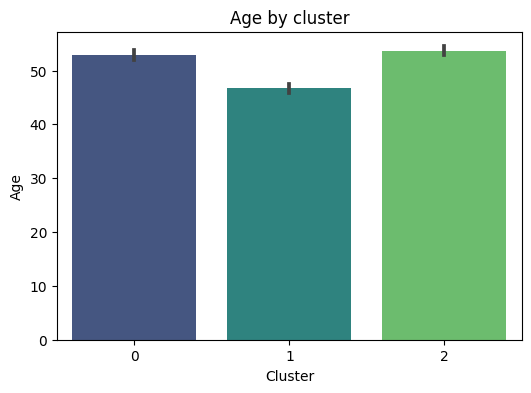

In [33]:
plt.figure(figsize=(6, 4))
sns.barplot(x='cluster_label', y='Age', data=data, palette='viridis')
plt.title('Age by cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')